## Import Libraries and Dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

Documentation about load_digits: https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#:~:text=The%20Digit%20Dataset%C2%B6.%20This%20dataset%20is%20made%20up,See%20here%20for%20more%20information%20about%20this%20dataset.

In [2]:
digits = load_digits()

## Analyzing data

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

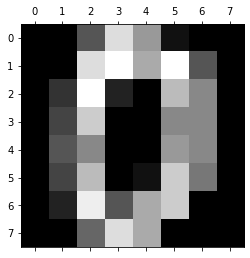

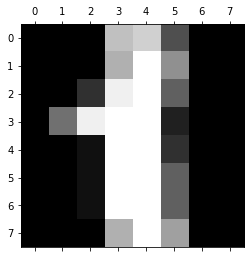

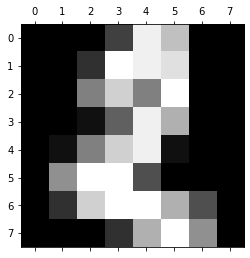

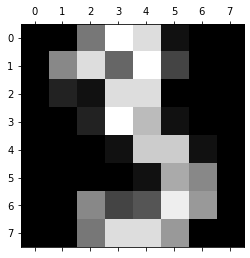

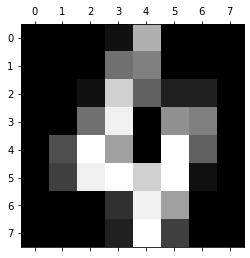

In [19]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [7]:
digits.target[0:3]

array([0, 1, 2])

## Train & Test

In [8]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [12]:
len(X_train)

1437

In [13]:
len(X_test)

360

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train,y_train)

c:\users\elsaw\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluate the model

In [18]:
model.score(X_test, y_test)

0.9638888888888889

The accuracy is 96%.

## Predict the test set results

In [20]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

The model predicted the first 5 digits correctly.

I want to know where my model fails. For that, let's use confusion matrix.

In [21]:
predictions =  model.predict(X_test)
from sklearn.metrics import confusion_matrix

Text(69.0, 0.5, 'Truth')

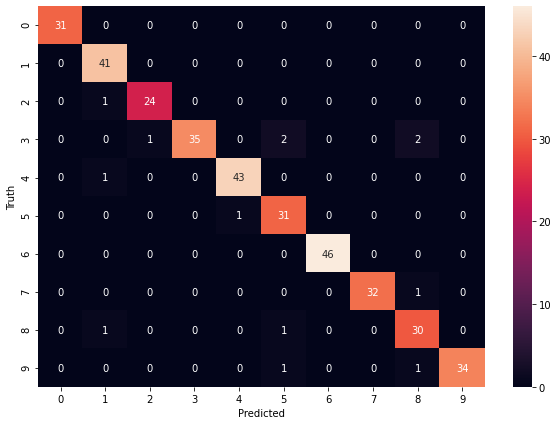

In [27]:
cm = confusion_matrix(y_test, predictions)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Explanation: 31 times the model predicted 0 and it was really 0; 2 times the model predicted 5 but it was 3.